<font size="+3" color="#000000"><b>Credit Card Prediction</b></font>

<div style="text-align: center;">
    <img src="https://media.licdn.com/dms/image/D4D12AQFlmAfjgld0xA/article-cover_image-shrink_600_2000/0/1694776207408?e=2147483647&v=beta&t=N-Y37i0b6_63Wusfmr7f2NSCA-1IRlwNEOiZWBpMY7w" alt="Flight Price Prediction" width="750px" /> 
</div>


In [1]:
def basicProjectInfo(fileName):
    df = pd.read_csv(fileName)
    return df

def info(df):
    return df.info()

def checkNull(df):
    return df.isnull().sum()

def dropNull(df):
    return df.dropna(inplace=True)

def custom_fillna(df):
    column = input("Enter the column name to fill NaN values (press Enter for all columns): ")

    if column == '':
        # If no specific column is provided, fill NaN values in all columns
        method = input("Enter the fill method (e.g., 'ffill', 'bfill', 'pad', 'backfill', 'nearest', 'mean', 'mode', 'None'): ")
        if method.lower() == 'none':
            value = input("Enter the value to fill NaN (e.g., '0', 'unknown'): ")
            df.fillna(value=value, inplace=True)
        elif method.lower() == 'mean':
            df.fillna(df.mean(), inplace=True)
        elif method.lower() == 'mode':
            df.fillna(df.mode().iloc[0], inplace=True)
        else:
            df.fillna(method=method, inplace=True)
    else:
        # If a specific column is provided, fill NaN values in that column
        method = input("Enter the fill method (e.g., 'ffill', 'bfill', 'pad', 'backfill', 'nearest', 'None'): ")
        if method.lower() == 'none':
            value = input("Enter the value to fill NaN in '{}' column (e.g., '0', 'unknown'): ".format(column))
            df[column].fillna(value=value, inplace=True)
        else:
            df[column].fillna(method=method, inplace=True)

    return df
    
    
def custom_replace(df, to_replace, value):
    if value.lower() == 'nan':
        # If value is 'nan' (case-insensitive), replace directly without converting columns
        df.replace(to_replace=to_replace, value=np.nan, inplace=True)
    elif isinstance(value, (int, float, np.number)):
        # If value is numeric, convert columns to numeric type
        df = df.apply(pd.to_numeric, errors='ignore')
        df.replace(to_replace=to_replace, value=value, inplace=True)
    else:
        # If value is a string or other type, replace directly without converting columns
        df.replace(to_replace=to_replace, value=value, inplace=True)
    
    return df
    
def custom_rename(df):
    column_mapping = {}
    
    while True:
        existing_column = input("Enter the existing column name (press Enter to finish): ").strip()
        if not existing_column:
            break
        new_column = input("Enter the new column name: ")
        column_mapping[existing_column] = new_column

    if column_mapping:
        df.rename(columns=column_mapping, inplace=True)
        return df
    else:
        print("No column names provided. DataFrame remains unchanged.")
        return df

def dropColumns(df,columnList):
    df.drop(columns = columnList,axis=1,inplace = True)
    return df

def dropNull(df):
    df.dropna(inplace=True)
    return df

def categoryChange(df, columnMap):
    for column, dtype_param in columnMap.items():
        if dtype_param == 'date':
            df[column] = pd.to_datetime(df[column])
        else:
            df[column] = df[column].astype(dtype_param)
    return df

def addColumns(df, new_column_name):
    if new_column_name in ['Day', 'Week', 'Month', 'Year']:
        # If the new column name is one of 'Day', 'Week', 'Month', or 'Year'
        date_column = input("Enter the name of the date column: ")
        if date_column in df.columns and pd.api.types.is_datetime64_any_dtype(df[date_column]):
            if new_column_name == 'Day':
                df[new_column_name] = df[date_column].dt.day
            elif new_column_name == 'Week':
                df[new_column_name] = df[date_column].dt.isocalendar().week
            elif new_column_name == 'Month':
                df[new_column_name] = df[date_column].dt.month
            elif new_column_name == 'Year':
                df[new_column_name] = df[date_column].dt.year
        else:
            print("Invalid date column name or not a valid date column.")
    else:
        # If the new column name is different, ask the user for values
        values = input(f"Enter values for the new column '{new_column_name}' (comma-separated): ").split(',')
        df[new_column_name] = values

    return df

       
def outlierDtection(df):
     box_plot(df, hue=None, xlabel=None, title=None)
    
def outlierRemoval(df, method, columns):
    if method == 'drop':
        for col in columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    elif method == 'cap':
        for col in columns:
            lower = df[col].quantile(0.25)
            upper = df[col].quantile(0.75)
            IQR = upper - lower
            upperLimit = upper + 1.5 * IQR
            lowerLimit = lower - 1.5 * IQR
            df[col] = np.where(df[col] > upperLimit, upperLimit, np.where(df[col] < lowerLimit, lowerLimit, df[col]))

    return df

In [2]:
def create_condition(column_name, operator, value):
    # Convert the provided value based on the column dtype
    column_dtype = df[column_name].dtype
    if pd.api.types.is_numeric_dtype(column_dtype):
        try:
            value = pd.to_numeric(value)
        except (ValueError, TypeError):
            raise ValueError(f"Invalid value: {value}. Cannot convert to numeric.")
    else:
        # If the column is not numeric, keep the value as a string
        value = str(value)  

    if operator == '==':
        return df[column_name] == value
    elif operator == '!=':
        return df[column_name] != value
    elif operator == '>':
        return df[column_name] > value
    elif operator == '<':
        return df[column_name] < value
    elif operator == '>=':
        return df[column_name] >= value
    elif operator == '<=':
        return df[column_name] <= value
    else:
        raise ValueError(f"Invalid operator: {operator}. Use '==', '!=', '>', '<', '>=', '<='.")

def get_user_condition():
    column_name = input("Enter column name: ").strip()
    operator = input("Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ").strip()
    value = input("Enter value: ").strip()

    return create_condition(column_name, operator, value)

def apply_user_conditions(df):
    conditions = []
    logical_operator = 'and'  # Initialize logical_operator outside the loop
    
    while True:
        condition = get_user_condition()
        conditions.append(condition)

        apply_more = input("Do you want to apply more conditions? (yes/no): ").strip().lower()
        if apply_more == 'yes':
            logical_operator = input("Enter logical operator ('and' or 'or'): ").strip().lower()
        else:
            break

        if logical_operator not in ['and', 'or']:
            raise ValueError(f"Invalid logical operator: {logical_operator}. Use 'and' or 'or'.")

    if logical_operator == 'and':
        result_condition = pd.Series(True, index=df.index)
        for cond in conditions:
            result_condition = result_condition & cond
    elif logical_operator == 'or':
        result_condition = pd.Series(False, index=df.index)
        for cond in conditions:
            result_condition = result_condition | cond

    # Apply the combined condition to filter the DataFrame
    result_df = df[result_condition]
    return result_df

In [3]:
def grouping(df):
    
    
    group_columns = [col.strip().replace("'", "") for col in input("Enter group columns separated by commas: ").split(',')]

   
    aggregation_map = {}
    while True:
        column_name = input("Enter column for aggregation (or type 'done' to finish): ").strip()
        if column_name.lower() == 'done':
            break

        aggregation_function = input(f"Enter aggregation function for {column_name} (e.g., 'sum', 'mean', 'count'): ").strip()
        alias = input(f"Enter alias for {column_name}: ").strip()

        aggregation_map[alias] = (column_name, aggregation_function)

   
    sort_columns = [col.strip().replace("'", "") for col in input("Enter columns for sorting separated by commas: ").split(',')]
    sort_order = input("Enter sorting order ('asc' or 'desc'): ").strip()
    if sort_order=='asc':
        order = True
    else:
        order = False

  
    column_tuple = list(aggregation_map.values())
    
    
    grouped_df = df.groupby(group_columns).agg(dict(column_tuple)).sort_values(by=sort_columns, ascending=order)

    
    grouped_df.reset_index(inplace=True)

    return grouped_df



<font color="#FF8C00"><h2>Funtions for Graphs</font>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def pie_plot(df, values):
    value_counts = df[values].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Plot of {values}')
    plt.show()

    plt.show()

def count_plot(df, x, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.countplot(x=x, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def kde_plot(df, x, xlabel=None, title=None):
    sns.kdeplot(data=df, x=x, fill=True)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

def scatter_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.scatterplot(x=x, y=y, hue=hue, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def regression_plot(df, x, y, xlabel=None, ylabel=None, title=None):
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def heatmap(df, xlabel=None, ylabel=None, title=None):
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def box_plot(df, hue=None, xlabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.boxplot(data=df, x=hue)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def rel_plot(df, x, y, hue=None, xlabel=None, ylabel=None, title=None):
    if hue is not None and hue.strip() == '':
        hue = None
    sns.relplot(x=x, y=y, hue=hue, data=df, kind='line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def choose_plot():
    print("Choose a plot type:")
    print("1. Bar Plot")
    print("2. Pie Plot")
    print("3. Count Plot")
    print("4. KDE Plot")
    print("5. Scatter Plot")
    print("6. Regression Plot")
    print("7. Heatmap")
    print("8. Box Plot")
    print("9. Relational Plot")
    
    choice = input("Enter the number corresponding to your choice: ")

    if not choice.isdigit() or int(choice) not in range(1, 10):
        print("Invalid choice. Please enter a number between 1 and 9.")
        return

    choice = int(choice)
    if choice == 1:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        bar_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 2:
        values = input("Enter the name of the values variable: ")
        pie_plot(df, values)
        
    elif choice == 3:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        count_plot(df, x, hue, xlabel, ylabel, title)
        
    elif choice == 4:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        kde_plot(df, x, xlabel, title)
        
    elif choice == 5:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        scatter_plot(df, x, y, hue, xlabel, ylabel, title)
        
    elif choice == 6:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        regression_plot(df, x, y, xlabel, ylabel, title)
        
    elif choice == 7:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        heatmap(df, xlabel, ylabel, title)
        
    elif choice == 8:
        xlabel = input("Enter the x-axis label: ")
        title = input("Enter the plot title: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        box_plot(df, hue, xlabel, title)
        
    elif choice == 9:
        xlabel = input("Enter the x-axis label: ")
        ylabel = input("Enter the y-axis label: ")
        title = input("Enter the plot title: ")
        x = input("Enter the name of the x-axis variable: ")
        y = input("Enter the name of the y-axis variable: ")
        hue = input("Enter the name of the hue variable (optional, press Enter to skip): ").strip()
        rel_plot(df, x, y, hue, xlabel, ylabel, title)
    else:
        print("Invalid choice. Please enter a number between 1 and 9.")


In [5]:
def custom_train_test_split(data):

    target_column = input("Enter the target variable column name: ")
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")
    test_size = float(input("Enter the test size (as a decimal between 0.0 and 1.0): "))
    random_state_str = input("Enter the random state (optional, press Enter to use default 10): ")
    random_state = int(random_state_str) if random_state_str else 10
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

def custom_encoding(y_train,y_test):
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    return y_train,y_test

In [6]:
def custom_transform(X_train,X_test):
    # Get user input for columns to apply different transformers
    power_columns = input("Enter columns to apply Power Transformer (comma-separated, press Enter to skip): ")
    function_columns = input("Enter columns to apply Function Transformer (comma-separated, press Enter to skip): ")
    ohe_columns = input("Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): ")
    ordinal_columns = input("Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): ")
    standard_columns = input("Enter columns to apply StandardScaler (comma-separated, press Enter to skip): ")

    # Process input for Power Transformer
    power_columns = [col.strip() for col in power_columns.split(',') if col.strip()]
    if not power_columns:
        power_columns = None

    # Process input for Function Transformer
    function_columns = [col.strip() for col in function_columns.split(',') if col.strip()]
    if not function_columns:
        function_columns = None

    # Process input for OneHotEncoder
    ohe_columns = [col.strip() for col in ohe_columns.split(',') if col.strip()]
    if not ohe_columns:
        ohe_columns = None

    # Process input for Ordinal Encoder
    ordinal_columns = [col.strip() for col in ordinal_columns.split(',') if col.strip()]
    if not ordinal_columns:
        ordinal_columns = None

    # Process input for StandardScaler
    standard_columns = [col.strip() for col in standard_columns.split(',') if col.strip()]
    if not standard_columns:
        standard_columns = None

    # Define the transformers
    transformers = [
        ('power', PowerTransformer(), power_columns),
        ('function', FunctionTransformer(np.log1p), function_columns),
        ('ohe', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), ohe_columns),
        ('ordinal', OrdinalEncoder(), ordinal_columns),
        ('standard', StandardScaler(), standard_columns)
    ]

    # Filter out transformers with None columns
    transformers = [(name, transformer, columns) for name, transformer, columns in transformers if columns is not None]

    # Define the ColumnTransformer
    preprocessor = ColumnTransformer(transformers)

    # Create a pipeline with the ColumnTransformer and any additional steps
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Assuming 'data' is your DataFrame
    # Fit and transform the training data
    X_train = pipeline.fit_transform(X_train)

    # Transform the test data
    X_test = pipeline.transform(X_test)

    return X_train, X_test

In [7]:
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def decision_tree(X_train, y_train, X_test, params=None):
    model = DecisionTreeRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def random_forest(X_train, y_train, X_test, params=None):
    model = RandomForestRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def knn(X_train, y_train, X_test, params=None):
    model = KNeighborsRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def support_vector_machine(X_train, y_train, X_test, params=None):
    model = SVR()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def xgboost(X_train, y_train, X_test, params=None):
    model = XGBRegressor()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def logistic_regression(X_train, y_train, X_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def decision_tree_classifier(X_train, y_train, X_test, params=None):
    model = DecisionTreeClassifier()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def random_forest_classifier(X_train, y_train, X_test, params=None):
    model = RandomForestClassifier()
    if params:
        model = GridSearchCV(model, params, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def naive_bayes(X_train, y_train, X_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


In [8]:
def select_model():
    print("Select a model:")
    print("1. Linear Regression")
    print("2. Logistic Regression")
    print("3. Decision Tree Regressor")
    print("4. Random Forest Regressor")
    print("5. k-Nearest Neighbors Regressor")
    print("6. Support Vector Machine Regressor")
    print("7. XGBoost Regressor")
    print("8. Decision Tree Classifier")
    print("9. Random Forest Classifier")
    print("10. Naive Bayes")

    choice = int(input("Enter the number corresponding to your choice: "))
    return choice

def get_hyperparameters(model_choice):
    if model_choice in [1, 2, 6, 7]:
        return None
    elif model_choice in [3, 4, 8, 9]:
        max_depths = input("Enter max depths (comma-separated): ").split(',')
        return {'max_depth': [int(depth) for depth in max_depths]}
    elif model_choice == 5:
        return {'n_neighbors': int(input("Enter the number of neighbors: "))}
    elif model_choice == 10:
        return None

def evaluate_model(y_actual, y_pred, classification=False):
    if classification:
        report_dict = classification_report(y_actual, y_pred, output_dict=True)
        accuracy = report_dict.pop('accuracy', None)  # Extract accuracy from the dictionary
        report_dict['accuracy'] = accuracy
        return report_dict
    else:
        r2 = r2_score(y_actual, y_pred)
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        return {'R2 Score': r2, 'RMSE': rmse}
    
def model_evaluation_df(y_actual, y_pred, model_name, classification):
    if classification:
        classification_report_dict = classification_report(y_actual, y_pred, output_dict=True)
        df_classification_report = pd.DataFrame(classification_report_dict).transpose()
        print(df_classification_report)
        
        # Plot confusion matrix
        cm = confusion_matrix(y_actual, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Adjust display_labels as needed
        disp.plot()

        # You can also customize the plot further if needed
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        plt.show()
    else:
        # Assuming y_actual and y_pred are DataFrame columns
        regression_plot(pd.DataFrame({ 'y_actual': y_actual, 'y_pred': y_pred }), 'y_actual', 'y_pred', xlabel=None, ylabel=None, title=None)

    evaluation_dict = evaluate_model(y_actual, y_pred, classification)
    evaluation_dict['Model'] = model_name
    df = pd.DataFrame(evaluation_dict, index=[0])
    return df


def hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice):
    hyperparameters = get_hyperparameters(model_choice)

    is_classification = input("Is this a classification problem? (yes/no): ").strip().lower()
    classification = is_classification == 'yes'

    if model_choice == 1:
        y_pred = linear_regression(X_train, y_train, X_test)
        model_name = 'Linear Regression'
    elif model_choice == 2:
        y_pred = logistic_regression(X_train, y_train, X_test)
        model_name = 'Logistic Regression'
    elif model_choice == 3:
        y_pred = decision_tree(X_train, y_train, X_test, hyperparameters)
        model_name = 'Decision Tree Regressor'
    elif model_choice == 4:
        y_pred = random_forest(X_train, y_train, X_test, hyperparameters)
        model_name = 'Random Forest Regressor'
    elif model_choice == 5:
        y_pred = knn(X_train, y_train, X_test, hyperparameters)
        model_name = 'k-Nearest Neighbors Regressor'
    elif model_choice == 6:
        y_pred = support_vector_machine(X_train, y_train, X_test, hyperparameters)
        model_name = 'Support Vector Machine Regressor'
    elif model_choice == 7:
        y_pred = xgboost(X_train, y_train, X_test, hyperparameters)
        model_name = 'XGBoost Regressor'
    elif model_choice == 8:
        y_pred = decision_tree_classifier(X_train, y_train, X_test, hyperparameters)
        model_name = 'Decision Tree Classifier'
    elif model_choice == 9:
        y_pred = random_forest_classifier(X_train, y_train, X_test, hyperparameters)
        model_name = 'Random Forest Classifier'
    elif model_choice == 10:
        y_pred = naive_bayes(X_train, y_train, X_test)
        model_name = 'Naive Bayes'

    df = model_evaluation_df(y_test, y_pred, model_name, classification)
    return df

In [9]:
import numpy as np
import pandas as pd
from io import StringIO
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [10]:
with open('creditcard.txt', 'r') as f:
    lines = f.readlines()
    
lines    

['"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"\n',
 '0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"\n',
 '0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.63555809325820

In [11]:
data_str = ''.join(lines)
data_file = StringIO(data_str)
df = pd.read_csv(data_file)
df

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
11660  19915  1.294875 -0.645847  0.689549 -0.351634 -1.026884 -0.129811   
11661  19915  1.404683 -0.554883  0.612239 -0.234956 -1.190992 -0.816824   
11662  19915 -0.945541  0.479754  1.521916 -1.298658 -0.852548 -0.604029   
11663  19915 -0.087909  0.184093  1.683910 -0.837378 -0.682605 -0.669907   
11664  19915  1.504229 -0.499337  0.052377 -0.576345 -0.393971  0.015149   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
11660 -0.928101  0.114172  0.804717  ... -0.097462 -0.020893  0.040297   
11661 -0.775771 -0.142637  1.121638  ... -0.196110 -0.303562  0.005661   
11662 -0.354686  0.498106  0.407159  ... -0.050745  0.056031 -0.055584   
11663 -0.056222 -0.120669  0.409636  ... -0.109428 -0.054760 -0.139329   
11664 -0.718603 -0.125852  1.023281  ...       NaN       NaN       NaN   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...         ...       ...       ...       ...       ...     ...    ...  
11660  0.159282  0.350705 -0.278351 -0.010354 -0.008003   10.00    0.0  
11661  0.313352  0.473813 -0.276618 -0.024026  0.002106    5.00    0.0  
11662  0.312195  0.026299 -0.413466  0.189152  0.086360   10.00    0.0  
11663  0.333267  0.072695 -0.320292  0.006423  0.010148   10.00    0.0  
11664       NaN       NaN       NaN       NaN       NaN     NaN    NaN  

[11665 rows x 31 columns]

In [12]:
checkNull(df)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [13]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [14]:
#To rename columns
#df = custom_rename(df)
#df

In [15]:
# To repalce any value in the dataFrame
#to_replace = input("Enter the value to be replace: ")
#value = input("Enter the new value  ")
#df = custom_replace(df, to_replace, value)
#df

In [16]:
#To fill null values
#uncomment if you want to fill null values
#df = custom_fillna(df)
#df

In [17]:
# Drop columns
#columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
#df = dropColumns(df, columns_to_drop)
#print("\nDataFrame after dropping columns:")
#df


In [18]:
# Drop null values
df = dropNull(df)
df


Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
11659  19914  1.348167 -0.531813  0.737667 -0.312410 -1.147767 -0.585711   
11660  19915  1.294875 -0.645847  0.689549 -0.351634 -1.026884 -0.129811   
11661  19915  1.404683 -0.554883  0.612239 -0.234956 -1.190992 -0.816824   
11662  19915 -0.945541  0.479754  1.521916 -1.298658 -0.852548 -0.604029   
11663  19915 -0.087909  0.184093  1.683910 -0.837378 -0.682605 -0.669907   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
11659 -0.810412 -0.062116  0.705208  ... -0.120215 -0.076450  0.006995   
11660 -0.928101  0.114172  0.804717  ... -0.097462 -0.020893  0.040297   
11661 -0.775771 -0.142637  1.121638  ... -0.196110 -0.303562  0.005661   
11662 -0.354686  0.498106  0.407159  ... -0.050745  0.056031 -0.055584   
11663 -0.056222 -0.120669  0.409636  ... -0.109428 -0.054760 -0.139329   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...         ...       ...       ...       ...       ...     ...    ...  
11659  0.489243  0.448523 -0.309831 -0.021411 -0.003987    5.00    0.0  
11660  0.159282  0.350705 -0.278351 -0.010354 -0.008003   10.00    0.0  
11661  0.313352  0.473813 -0.276618 -0.024026  0.002106    5.00    0.0  
11662  0.312195  0.026299 -0.413466  0.189152  0.086360   10.00    0.0  
11663  0.333267  0.072695 -0.320292  0.006423  0.010148   10.00    0.0  

[11664 rows x 31 columns]

In [19]:
checkNull(df)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# Category change
column_map = {'Class': 'category'}
df = categoryChange(df, column_map)
print("\nDataFrame after category change:")
df.head()



DataFrame after category change:


Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [21]:
checkNull(df)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
# Add columns
#uncomment if you want to add columns
#addColumns(df, new_column_name))
#df.head()

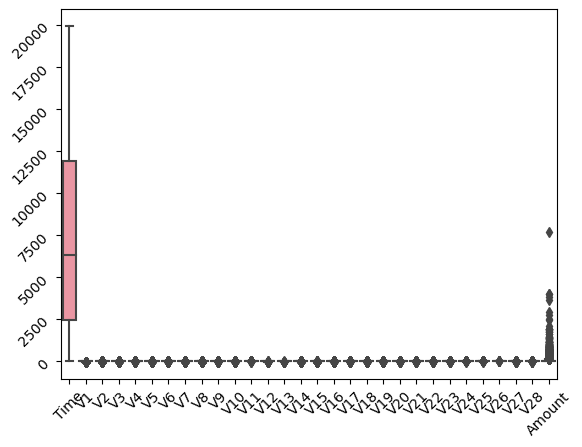

In [23]:
# Outlier detection and removal
outlierDtection(df)

In [24]:
#uncommnent if you want to drop outliers
#columns = input("Enter columns to treat (comma-separated): ").split(',')
#method = input("Enter how to treat outlier drop/cap: ")
#df = outlierRemoval(df, method, columns)
#df

In [25]:
# Outlier detection and removal
#outlierDtection(df)

Filtering


In [26]:
#result_df = apply_user_conditions(df)
#result_df

In [27]:
# Apply user-defined grouping
#result_df = grouping(df)
#result_df

In [28]:
df.Class.value_counts(normalize=True)*100.0

0.0    99.579904
1.0     0.420096
Name: Class, dtype: float64

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 3
Enter the x-axis label: CLASS
Enter the y-axis label: COUNT
Enter the plot title: FAIR & FRAUD TRANSACTIONS
Enter the name of the x-axis variable: Class
Enter the name of the hue variable (optional, press Enter to skip): 


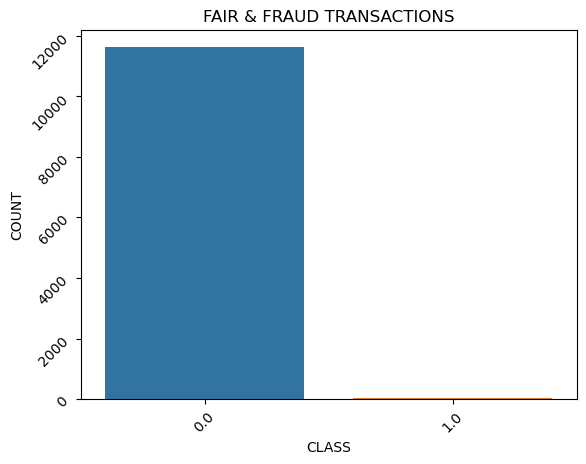

In [29]:
# Visualization
choose_plot()

In [30]:
sc = StandardScaler()
df['Normalized_Amount']= sc.fit_transform(df['Amount'].values.reshape(-1,1))
df

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
11659  19914  1.348167 -0.531813  0.737667 -0.312410 -1.147767 -0.585711   
11660  19915  1.294875 -0.645847  0.689549 -0.351634 -1.026884 -0.129811   
11661  19915  1.404683 -0.554883  0.612239 -0.234956 -1.190992 -0.816824   
11662  19915 -0.945541  0.479754  1.521916 -1.298658 -0.852548 -0.604029   
11663  19915 -0.087909  0.184093  1.683910 -0.837378 -0.682605 -0.669907   

             V7        V8        V9  ...       V22       V23       V24  \
0      0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928   
1     -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846   
2      0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281   
3      0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575   
4      0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267   
...         ...       ...       ...  ...       ...       ...       ...   
11659 -0.810412 -0.062116  0.705208  ... -0.076450  0.006995  0.489243   
11660 -0.928101  0.114172  0.804717  ... -0.020893  0.040297  0.159282   
11661 -0.775771 -0.142637  1.121638  ... -0.303562  0.005661  0.313352   
11662 -0.354686  0.498106  0.407159  ...  0.056031 -0.055584  0.312195   
11663 -0.056222 -0.120669  0.409636  ... -0.054760 -0.139329  0.333267   

            V25       V26       V27       V28  Amount  Class  \
0      0.128539 -0.189115  0.133558 -0.021053  149.62    0.0   
1      0.167170  0.125895 -0.008983  0.014724    2.69    0.0   
2     -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0   
3      0.647376 -0.221929  0.062723  0.061458  123.50    0.0   
4     -0.206010  0.502292  0.219422  0.215153   69.99    0.0   
...         ...       ...       ...       ...     ...    ...   
11659  0.448523 -0.309831 -0.021411 -0.003987    5.00    0.0   
11660  0.350705 -0.278351 -0.010354 -0.008003   10.00    0.0   
11661  0.473813 -0.276618 -0.024026  0.002106    5.00    0.0   
11662  0.026299 -0.413466  0.189152  0.086360   10.00    0.0   
11663  0.072695 -0.320292  0.006423  0.010148   10.00    0.0   

       Normalized_Amount  
0               0.482873  
1              -0.334272  
2               1.756668  
3               0.337607  
4               0.040014  
...                  ...  
11659          -0.321425  
11660          -0.293618  
11661          -0.321425  
11662          -0.293618  
11663          -0.293618  

[11664 rows x 32 columns]

In [50]:
#Train Test Split
X_train, X_test, y_train, y_test = custom_train_test_split(df)

Enter the target variable column name: Class
Enter the test size (as a decimal between 0.0 and 1.0): 0.2
Enter the random state (optional, press Enter to use default 10): 18


In [51]:
X_train

Time        V1        V2        V3        V4        V5        V6  \
1151     897 -0.395115  0.607197  1.416013 -0.239631 -0.206378  0.061775   
2172    1684  1.218844  0.183157  0.968741  1.039487 -0.607498 -0.326604   
3106    2666 -1.467643  3.494228 -3.314919  0.587026  1.334240 -0.909211   
3602    3081 -4.360242  5.684778 -3.753719  0.310469  0.239893 -1.863518   
2146    1655 -0.968431  0.991932  2.214030  1.619363 -0.885304  0.555810   
...      ...       ...       ...       ...       ...       ...       ...   
5294    5164 -0.915487 -3.399440 -1.126437  1.612170 -1.190341 -0.070311   
1726    1340 -0.278464  1.310743  0.477432  0.102364  0.878538 -1.014989   
2885    2436 -0.324298  0.581871  0.859599 -2.135322  0.270068 -1.258110   
9336   13536 -0.619359  1.400167  1.041291 -0.127694  0.827773 -1.164008   
11562  19908  1.405412 -0.494872  0.630604 -0.241951 -1.119805 -0.802388   

             V7        V8        V9  ...       V21       V22       V23  \
1151   0.535386  0.058800 -0.048408  ...  0.020585  0.205178 -0.251440   
2172  -0.372634 -0.021680  0.373038  ...  0.011638  0.105514 -0.028078   
3106   0.944745 -0.162952  1.664064  ... -0.547837 -0.490145  0.003168   
3602   1.209372 -0.408977  4.390536  ... -1.005170 -0.255062  0.285958   
2146  -0.329020  0.822437  0.109942  ... -0.290018 -0.429030 -0.047220   
...         ...       ...       ...  ...       ...       ...       ...   
5294   1.488157 -0.434074  1.182271  ...  0.487133 -0.819884 -1.135484   
1726   1.068201 -0.250151 -0.844904  ... -0.077420 -0.179170 -0.316155   
2885   1.053417 -0.319239  1.112996  ...  0.009052  0.330286 -0.338197   
9336   1.036133 -0.229195  0.160604  ... -0.118866 -0.136960 -0.263625   
11562 -0.718641 -0.191162  0.996848  ... -0.186779 -0.235537 -0.005491   

            V24       V25       V26       V27       V28   Amount  \
1151   0.090647  0.114307  0.620850 -0.131471 -0.012454    42.35   
2172   0.022169  0.404863 -0.418941  0.061337  0.036282     3.45   
3106  -1.414570  0.243536 -0.314775  1.238524  0.432597     0.89   
3602  -0.028311  0.434955 -0.515676  0.886544 -0.629143     0.89   
2146   0.542954 -0.001065 -0.428457  0.302630  0.113202     9.99   
...         ...       ...       ...       ...       ...      ...   
5294   0.044055  0.218116  0.401155 -0.300773  0.175775  1129.10   
1726  -0.183033  0.199174  0.354958  0.022207  0.075148     0.76   
2885  -0.153336  0.084870 -0.803102  0.227627 -0.022215     1.00   
9336   0.398748  0.087844  0.133134  0.014175  0.117147     0.76   
11562  0.317738  0.502066 -0.278480 -0.018528  0.003708     5.00   

       Normalized_Amount  
1151           -0.113705  
2172           -0.330045  
3106           -0.344283  
3602           -0.344283  
2146           -0.293673  
...                  ...  
5294            5.930206  
1726           -0.345006  
2885           -0.343671  
9336           -0.345006  
11562          -0.321425  

[9331 rows x 31 columns]

In [52]:
sm = SMOTE(random_state=22)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [53]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Normalized_Amount'],
      dtype='object')

In [54]:
#applying transformers on feature varaiables

X_train, X_test = custom_transform(X_train, X_test)

Enter columns to apply Power Transformer (comma-separated, press Enter to skip): Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Enter columns to apply Function Transformer (comma-separated, press Enter to skip): Amount
Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): 
Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): 
Enter columns to apply StandardScaler (comma-separated, press Enter to skip): 


In [55]:
# applying encoding on target variables
y_train, y_test = custom_encoding(y_train,y_test)

In [56]:
X_train

array([[-1.76360168,  0.06953817, -0.58461176, ..., -0.50197705,
        -0.32342433,  3.7693067 ],
       [-1.5129005 ,  1.46469907, -0.76100308, ..., -0.28729972,
        -0.21625794,  1.4929041 ],
       [-1.24745647, -0.37024625,  0.52756461, ...,  1.06255301,
         0.7302433 ,  0.63657683],
       ...,
       [ 0.43873494, -0.53538708,  1.31885323, ...,  1.11388698,
         1.35545057,  0.69314718],
       [ 0.4715873 , -0.79278427,  0.50870374, ..., -0.02431016,
         1.33226865,  0.41696976],
       [ 0.63700903, -0.73468478,  1.80956784, ...,  1.85676191,
         1.68787475,  0.69314718]])

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(18576, 30)
(2333, 30)
(18576,)
(2333,)


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 2
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score      support
0              0.999138  0.996562  0.997849  2327.000000
1              0.333333  0.666667  0.444444     6.000000
accuracy       0.995714  0.995714  0.995714     0.995714
macro avg      0.666236  0.831614  0.721146  2333.000000
weighted avg   0.997426  0.995714  0.996425  2333.000000


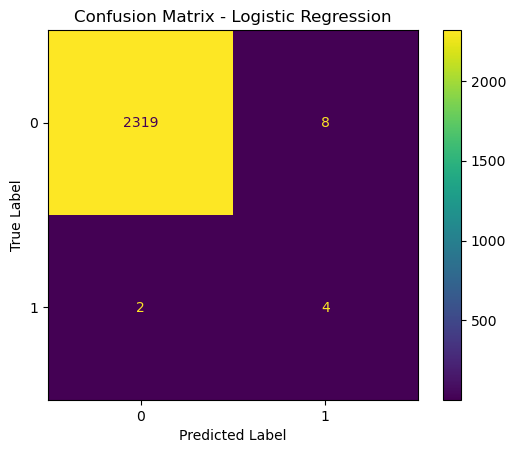

0   1  macro avg  weighted avg  accuracy                Model
0 NaN NaN        NaN           NaN  0.995714  Logistic Regression

In [59]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df

Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 8
Enter max depths (comma-separated): 2,4,5,10
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score      support
0              0.999140  0.998711  0.998925  2327.000000
1              0.571429  0.666667  0.615385     6.000000
accuracy       0.997857  0.997857  0.997857     0.997857
macro avg      0.785284  0.832689  0.807155  2333.000000
weighted avg   0.998040  0.997857  0.997939  2333.000000


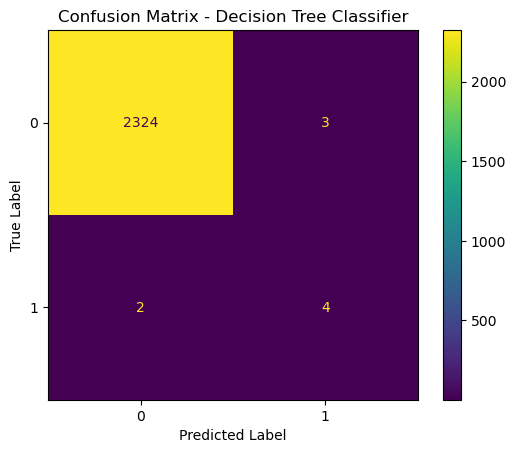

0   1  macro avg  weighted avg  accuracy                     Model
0 NaN NaN        NaN           NaN  0.997857  Decision Tree Classifier

In [60]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 9
Enter max depths (comma-separated): 3,5,8,11
Is this a classification problem? (yes/no): yes
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   2326.0
1                   1.0     1.0       1.0      7.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   2333.0
weighted avg        1.0     1.0       1.0   2333.0


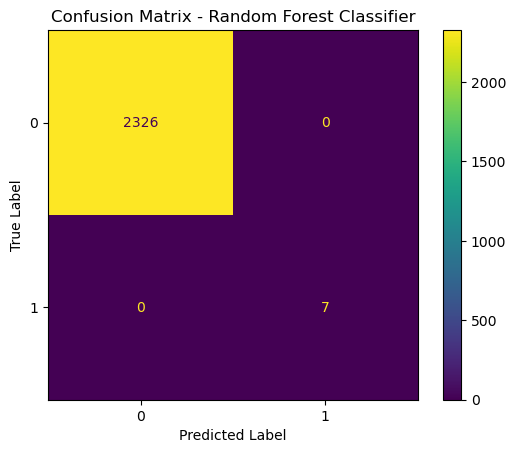

0   1  macro avg  weighted avg  accuracy                     Model
0 NaN NaN        NaN           NaN       1.0  Random Forest Classifier

In [46]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 10
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score      support
0              0.999568  0.993554  0.996552  2327.000000
1              0.250000  0.833333  0.384615     6.000000
accuracy       0.993142  0.993142  0.993142     0.993142
macro avg      0.624784  0.913444  0.690584  2333.000000
weighted avg   0.997640  0.993142  0.994978  2333.000000


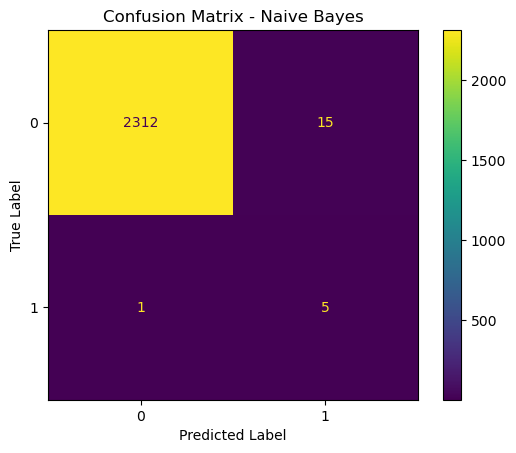

0   1  macro avg  weighted avg  accuracy        Model
0 NaN NaN        NaN           NaN  0.993142  Naive Bayes

In [61]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df
